### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #pasar esta a houses
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


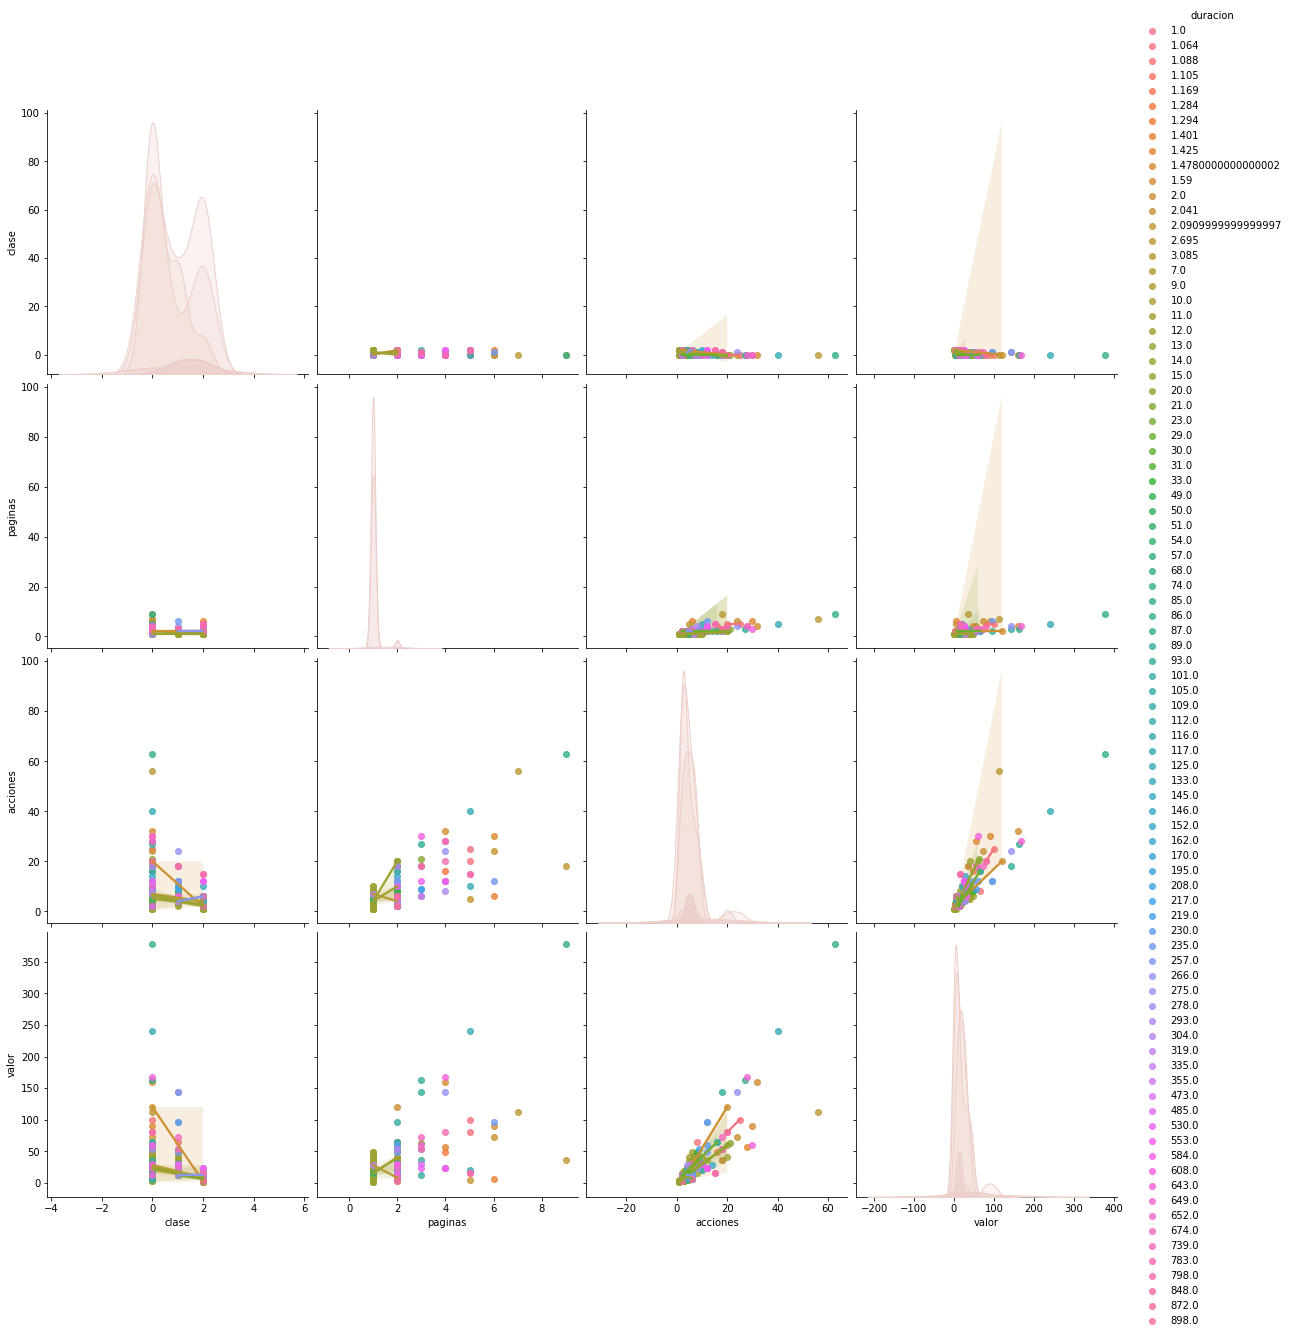

In [4]:
sb.pairplot(dataframe.dropna(), hue='duracion',size=4,vars=["clase", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

In [5]:
X = np.array(dataframe.drop(['duracion'], 1))
y = np.array(dataframe['duracion'])

In [6]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [7]:
model.score(X,y)

0.10198661828479649

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train, y_train, color='b')

ValueError: x and y must be the same size

In [ ]:
regression_results(y_true=y_test, y_pred=model.predict(X_test))

In [16]:
validation_size = 0.20
seed = 7 # nuemrp de volitas que saco

X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
name='Linear Regression'
kfold = model_selection.KFold(n_splits=10,random_state=None) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[nan nan nan nan nan nan nan nan nan nan]
Linear Regression: nan (nan)


In [20]:
model.score(X_val, Y_val)

0.1394785570854976

In [21]:
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))

ValueError: continuous is not supported

In [19]:
acierto = accuracy_score(Y_val, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

NameError: name 'Y_test' is not defined